In [1]:
import tweepy

In [2]:
Consumer_Key = '9BdP2VhUYS4WIy4fABWp5EQgz'
Consumer_Secret = '5b0YIYubhINuGEnnAWRa9QfseB8OinyMI2rUvxtXm2noQtCzrh'

Access_Token = '783924601101258752-sFSeBNFbw3ODEOeemfwgRYg86e1suom'
Access_Secret = '9ijrPWYYHE5cCaXkod7dWesXpesdow3plwIkhHryHFAe2'

In [3]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
    auth.set_access_token(Access_Token, Access_Secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=300)

print ("Number of tweets extracted: {}.\n".format(len(tweets)))
print ("5 recent tweets: \n")
for tweet in tweets[:5]:
    print (tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets: 

....Also, why is Mueller only appointing Angry Dems, some of whom have worked for Crooked Hillary, others, includin… https://t.co/hX52XFQ91d

Is Robert Mueller ever going to release his conflicts of interest with respect to President Trump, including the fa… https://t.co/t0GHh6hsEg

There is No Collusion! The Robert Mueller Rigged Witch Hunt, headed now by 17 (increased from 13, including an Obam… https://t.co/mtUqvuvzZD

...and the Amazon Washington Post do nothing but write bad stories even on very positive achievements - and they will never change!

...dying newspaper industry. No matter how much they try to distract and cover it up, our country is making great p… https://t.co/UVMw8JEf8i



In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])
data.head()

,Tweet
0,Congressman David Kustoff has been a champion ...
1,Private business investment has surged from 1....
2,"The @USNavy’s first female Admiral, Alene Duer..."
3,We have accomplished an economic turnaround of...
4,I am thrilled to announce that in the second q...


In [7]:
data['len']= np.array([len(tweet.text) for tweet in tweets])
data['ID']= np.array([tweet.id  for tweet in tweets])
data['Date']= np.array([tweet.created_at  for tweet in tweets])
data['Scource']= np.array([tweet.source  for tweet in tweets])
data['Likes']= np.array([tweet.favorite_count  for tweet in tweets])
data['RTs']= np.array([tweet.retweet_count  for tweet in tweets])

In [8]:
data.head()

,Tweet,len,ID,Date,Scource,Likes,RTs
0,Congressman David Kustoff has been a champion ...,140,1022936690267176971,2018-07-27 20:08:06,Twitter for iPhone,17773,4618
1,Private business investment has surged from 1....,140,1022925366669856769,2018-07-27 19:23:07,Twitter for iPhone,22009,5969
2,"The @USNavy’s first female Admiral, Alene Duer...",140,1022908672756801536,2018-07-27 18:16:46,Twitter for iPhone,24173,5744
3,We have accomplished an economic turnaround of...,92,1022879441767288834,2018-07-27 16:20:37,Twitter for iPhone,35861,9474
4,I am thrilled to announce that in the second q...,140,1022877332858650624,2018-07-27 16:12:14,Twitter for iPhone,49944,12849


In [25]:
fav = np.max(data['Likes'])
fav

330847

In [26]:
fav_tweet

67

In [27]:
fav = np.max(data['Likes'])
rt= np.max(data['RTs'])

fav_tweet= data[data.Likes==fav].index[0]
rt_tweet= data[data.RTs==rt].index[0]

print (('Most liked tweet: \n') , (data['Tweet'][fav_tweet]))
print (('Most RT tweet: \n'), (data['Tweet'][rt_tweet]))

Most liked tweet: 
 To Iranian President Rouhani: NEVER, EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKE… https://t.co/xUdD66vfBW
Most RT tweet: 
 RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy


In [10]:
likes= pd.Series(data=data['Likes'].values, index=data['Date'])
RTs= pd.Series(data=data['RTs'].values, index=data['Date'])

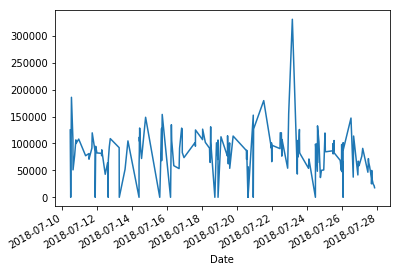

In [11]:
likes.plot()

In [13]:
from textblob import TextBlob
import re

In [14]:
def clean_data(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analyze_text(tweet):
    analysis = TextBlob(clean_data(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else: return -1
    

In [15]:
data['Tweet'][0]

'Congressman David Kustoff has been a champion for the Trump Agenda - I greatly appreciate his support. David is str… https://t.co/b69nex9NfW'

In [16]:
a=clean_data(data['Tweet'][1])
b=TextBlob(a)
b.sentiment.polarity

0.0

In [17]:
b=np.array(analyze_text(tweet) for tweet in data['Tweet'] )
b

array(<generator object <genexpr> at 0x00000226429D5CA8>, dtype=object)

In [18]:
clean_data(data['Tweet'][0])

'Congressman David Kustoff has been a champion for the Trump Agenda I greatly appreciate his support David is str'

In [19]:
data['SA']= np.array([analyze_text(tweet) for tweet in data['Tweet']])

In [20]:
data.head()

,Tweet,len,ID,Date,Scource,Likes,RTs,SA
0,Congressman David Kustoff has been a champion ...,140,1022936690267176971,2018-07-27 20:08:06,Twitter for iPhone,17773,4618,1
1,Private business investment has surged from 1....,140,1022925366669856769,2018-07-27 19:23:07,Twitter for iPhone,22009,5969,0
2,"The @USNavy’s first female Admiral, Alene Duer...",140,1022908672756801536,2018-07-27 18:16:46,Twitter for iPhone,24173,5744,1
3,We have accomplished an economic turnaround of...,92,1022879441767288834,2018-07-27 16:20:37,Twitter for iPhone,35861,9474,1
4,I am thrilled to announce that in the second q...,140,1022877332858650624,2018-07-27 16:12:14,Twitter for iPhone,49944,12849,1


In [21]:
pos_tweet=data[data['SA']==1]['Tweet']
neu_tweet=data[data['SA']==0]['Tweet']
neg_tweet=data[data['SA']==-1]['Tweet']

In [28]:
print (('% of positive tweets = '), (len(pos_tweet)*100)/len(data['Tweet']) , " %")
print (('% of neutral tweets = '), (len(neu_tweet)*100)/len(data['Tweet']) , " %")
print (('% of negative tweets = '), (len(neg_tweet)*100)/len(data['Tweet']) , " %")

% of positive tweets =  50.0  %
% of neutral tweets =  32.5  %
% of negative tweets =  17.5  %
